In [78]:
#Import libraries
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models.word2vec import Word2Vec
from transformers import pipeline
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# # Load pre-trained model tokenizer (vocabulary)
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [79]:
final_df = pd.read_csv("../dataset/final_df.csv")

In [80]:
#Drop Unnamed: 0 column
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [81]:
final_df.isnull().sum()

tweet_id            0
tweet_posted_on     0
tweets              0
cleaned_tweets     15
user_location       0
polarity            0
dtype: int64

In [82]:
np.where(final_df['cleaned_tweets'].isnull() == True)

(array([4017, 4018, 5236, 5830, 5929, 5997, 6118, 6307, 6308, 6797, 7734,
        9653, 9864, 9869, 9978]),)

In [83]:
final_df = final_df.dropna().reset_index(drop=True)
# final_df.reset_index(drop=True)
final_df.shape

(10219, 6)

In [84]:
final_df["tweet_word_count"]= final_df['cleaned_tweets'].str.split().map(len)

In [85]:
final_df["tweet_word_count"].sort_values(ascending=False).head()

5812    30
7396    30
5952    29
5470    29
7200    29
Name: tweet_word_count, dtype: int64

In [86]:
final_df['date'] = pd.to_datetime(final_df['tweet_posted_on']).dt.date

<AxesSubplot:xlabel='date'>

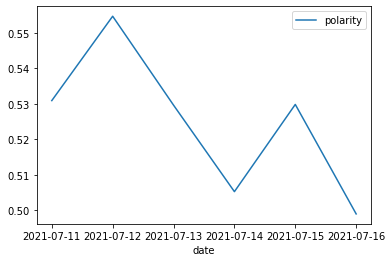

In [87]:
final_df.groupby(by='date')['polarity'].mean().plot(legend=True)

In [88]:
# X = final_df['cleaned_tweets']
# y = final_df['polarity']

In [89]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf = TfidfVectorizer(ngram_range=(1,1),stop_words='english', min_df = 2)

In [90]:
corpus = api.load('text8')
model = Word2Vec(corpus)

In [91]:
def get_avg_vec(text):
    try:
        # make a list of only the words in the document that are in the word2vec vocabulary
        valid_words = [word for word in text.lower().split() if word in model.wv.key_to_index]
        
        if len(valid_words) == 0:
            print();
            return np.zeros(shape=(100,))
        else:
            # return average word vector, for words in the document that exist in the vocab
            return np.mean([model.wv.get_vector(word) for word in valid_words], axis=0)
    except AttributeError:
        return np.zeros(shape=(100,))

In [92]:
avg_vecs = [get_avg_vec(doc) for doc in final_df['cleaned_tweets']]

In [93]:
vec_df = pd.DataFrame(avg_vecs)

In [94]:
vec_df.shape, final_df.shape

((10219, 100), (10219, 8))

In [95]:
full_df = pd.concat([final_df, vec_df], axis=1)

In [96]:
full_df = full_df.reset_index(drop=True)

In [97]:
full_df.head(3)

tweet_id            tweet_posted_on  \
0  1416181616846811137  2021-07-16 23:43:03+00:00   
1  1416181380279635970  2021-07-16 23:42:07+00:00   
2  1416181225979473920  2021-07-16 23:41:30+00:00   

                                              tweets  \
0  🏡 #RemoteWork is on the rise &amp; slowly beco...   
1  Opportunity to join a fantastic team at a hi-t...   
2  Good news for #JobSeekers open to #RemoteWork!...   

                                      cleaned_tweets  \
0  rise slowly becoming normal which mean need re...   
1  opportunity join fantastic team tech fast pace...   
2  good news open this excellent report from remo...   

                    user_location  polarity  tweet_word_count        date  \
0                    New York, NY         1                22  2021-07-16   
1               London | New York         1                23  2021-07-16   
2  Sydney | Hong Kong | Singapore         1                19  2021-07-16   

          0         1  ...        90        91        92        93        94  \
0 -0.002467  0.301891  ... -0.719181  0.602059 -0.382250  0.063107  0.246926   
1 -0.343339  0.171790  ... -0.441969 -0.078005 -0.340246 -0.115886  0.559481   
2 -0.381783 -0.066613  ... -0.664028  0.217924 -0.223607 -0.186115 -0.089896   

         95        96        97        98        99  
0  0.566359 -0.431004 -0.273586 -0.178542  1.334724  
1  0.284178  0.129533  0.066715  0.332726  0.448589  
2  0.420065  0.205630  0.054537  0.354640  0.854378  

[3 rows x 108 columns]

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
vec_col_names = full_df.columns[8:]

In [100]:
vec_cols = full_df[vec_col_names]

In [101]:
vec_cols

0         1         2         3         4         5         6   \
0     -0.002467  0.301891  0.003776 -0.193633 -0.091994 -0.324646  0.507504   
1     -0.343339  0.171790  0.259414  0.093594  0.185078 -0.424424  0.475629   
2     -0.381783 -0.066613 -0.058054 -0.377281  0.808554 -0.123582  0.984875   
3      0.275500 -0.066089  0.507077  0.489356 -0.329272  0.079158 -0.058239   
4      0.022792  0.353877 -0.357544 -0.766632  0.617483 -0.015593  0.695965   
...         ...       ...       ...       ...       ...       ...       ...   
10214 -1.115014 -0.495345  0.327768  0.681729 -0.064737  0.027838  0.827009   
10215 -1.115014 -0.495345  0.327768  0.681729 -0.064737  0.027838  0.827009   
10216  0.071428  0.351331 -0.038964 -0.214352 -0.220521  0.000343  0.213204   
10217 -0.345873  0.091365  0.130669 -0.093073  0.406230 -0.728378  0.634376   
10218 -0.386482 -0.157850  0.420561 -0.136294  0.034316 -0.172137  0.939089   

             7         8         9   ...        90        91        92  \
0     -0.023768  0.573416  0.479685  ... -0.719181  0.602059 -0.382250   
1      0.037516  0.575159  0.141802  ... -0.441969 -0.078005 -0.340246   
2     -0.755620  0.259842  0.529010  ... -0.664028  0.217924 -0.223607   
3      0.176697 -0.185877  1.022492  ... -0.210706  0.052561 -1.092435   
4     -0.163873 -0.454766  1.240509  ... -0.930377 -0.107244 -0.001728   
...         ...       ...       ...  ...       ...       ...       ...   
10214 -0.655896  0.462016  0.556248  ... -0.374106  1.891315 -0.687443   
10215 -0.655896  0.462016  0.556248  ... -0.374106  1.891315 -0.687443   
10216  0.264649 -0.032015  0.125647  ... -0.727039  0.474674 -0.991582   
10217 -0.593666  0.195255  0.271419  ... -0.124693  0.875196 -1.866930   
10218 -0.627305  0.377167  1.032424  ... -1.032728  0.359309 -1.137226   

             93        94        95        96        97        98        99  
0      0.063107  0.246926  0.566359 -0.431004 -0.273586 -0.178542  1.334724  
1     -0.115886  0.559481  0.284178  0.129533  0.066715  0.332726  0.448589  
2     -0.186115 -0.089896  0.420065  0.205630  0.054537  0.354640  0.854378  
3      0.139508 -0.174558 -0.044357 -0.066114 -0.530059 -0.093941  0.700708  
4      0.315545  0.074622  0.448971 -0.087766  0.267365  0.583811  0.610025  
...         ...       ...       ...       ...       ...       ...       ...  
10214 -0.382299 -0.574621  1.542674 -0.155635  0.006035  0.450453  0.779158  
10215 -0.382299 -0.574621  1.542674 -0.155635  0.006035  0.450453  0.779158  
10216 -0.507933  0.045539  0.642708 -0.140152 -0.314671  0.323823  0.903016  
10217 -0.097883  0.032958 -0.179525 -0.194206 -0.557197  0.711066  0.685643  
10218  0.039332  0.074745  0.221510  0.095354 -0.422674  0.301348  0.301174  

[10219 rows x 100 columns]

In [27]:
db = DBSCAN(eps=1)
db.fit(vec_cols)

DBSCAN(eps=1)

In [28]:
full_df['cluster_labels'] = db.labels_

In [29]:
full_df['cluster_labels'].value_counts()

-1      8033
 7        95
 125      81
 215      77
 129      57
        ... 
 173       5
 165       5
 8         5
 149       5
 231       5
Name: cluster_labels, Length: 233, dtype: int64

In [30]:
full_df[full_df['cluster_labels'] == 1]

tweet_id            tweet_posted_on  \
29  1416170176110813187  2021-07-16 22:57:35+00:00   
31  1416169208875003906  2021-07-16 22:53:45+00:00   
35  1416168714567831554  2021-07-16 22:51:47+00:00   
38  1416168040367104004  2021-07-16 22:49:06+00:00   
45  1416167740017188866  2021-07-16 22:47:55+00:00   

                                               tweets  \
29  RT: Jobicy: Hiring Care (@HiringCare)\nRT: Ren...   
31  RT @ReneeChane11e: Is Remote work still being ...   
35  RT: Renee Chanelle (@ReneeChane11e)\nIs Remote...   
38  RT @ReneeChane11e: Is Remote work still being ...   
45  Is Remote work still being used as leverage or...   

                                       cleaned_tweets         user_location  \
29  jobicy hiring care renee chanelle remote work ...            Everywhere   
31  remote work still being used leverage called p...           Chicago, IL   
35  renee chanelle remote work still being used le...            Everywhere   
38  remote work still being used leverage called p...       Berlin, Germany   
45  remote work still being used leverage called p...  Brisbane, Queensland   

    polarity  tweet_word_count        date         0         1  ...        91  \
29         0                18  2021-07-16 -0.090452 -0.175482  ...  0.761572   
31         0                13  2021-07-16 -0.087058 -0.194673  ...  0.758684   
35         0                15  2021-07-16 -0.085657 -0.180722  ...  0.703105   
38         0                13  2021-07-16 -0.087058 -0.194673  ...  0.758684   
45         0                13  2021-07-16 -0.087058 -0.194673  ...  0.758684   

          92        93        94        95        96        97        98  \
29  0.129825  0.119363  1.204360  0.207230 -0.069630 -0.685319  0.033976   
31  0.243434  0.172517  1.495412  0.140722  0.017481 -0.797885  0.115860   
35  0.228649  0.163972  1.391812  0.131745  0.017100 -0.743666  0.106167   
38  0.243434  0.172517  1.495412  0.140722  0.017481 -0.797885  0.115860   
45  0.243434  0.172517  1.495412  0.140722  0.017481 -0.797885  0.115860   

          99  cluster_labels  
29  1.163051               1  
31  1.166647               1  
35  1.083972               1  
38  1.166647               1  
45  1.166647               1  

[5 rows x 109 columns]

In [ ]:
full_df[full_df['cluster_labels'] == 2]

In [32]:
full_df[full_df['cluster_labels'] == -1]['cleaned_tweets']

0        rise slowly becoming normal which mean need re...
1        opportunity join fantastic team tech fast pace...
2        good news open this excellent report from remo...
3                four way energize post pandemic workforce
4        these tool that will save your google meet too...
                               ...                        
10213            application engineer from ecodyne limited
10214              graduate research associate from pareto
10215              graduate research associate from pareto
10216      learn from home deal inch with alexa built shop
10217    loss adjuster cert cila from exchange street f...
Name: cleaned_tweets, Length: 8033, dtype: object

In [40]:
full_df[full_df['cluster_labels'] == 212]

tweet_id            tweet_posted_on  \
8071  1415135077630156802  2021-07-14 02:24:29+00:00   
8072  1415134083265417219  2021-07-14 02:20:32+00:00   
8073  1415134063514501120  2021-07-14 02:20:27+00:00   
8676  1414903415432523777  2021-07-13 11:03:56+00:00   
8677  1414903357815275521  2021-07-13 11:03:42+00:00   
8679  1414902928478019596  2021-07-13 11:02:00+00:00   
8681  1414902694477590533  2021-07-13 11:01:04+00:00   

                                                 tweets  \
8071  RT @attacksolutions: Five Ways To Close Cybers...   
8072  RT @attacksolutions: Five Ways To Close Cybers...   
8073  RT @attacksolutions: Five Ways To Close Cybers...   
8676  RT @attacksolutions: Five Ways To Close Cybers...   
8677  RT @attacksolutions: Five Ways To Close Cybers...   
8679  RT @attacksolutions: Five Ways To Close Cybers...   
8681  Five Ways To Close Cybersecurity Gaps Created ...   

                                         cleaned_tweets         user_location  \
8071  five way close cybersecurity gap created pandemic  Dublin City, Ireland   
8072  five way close cybersecurity gap created pandemic      Hyderabad, India   
8073  five way close cybersecurity gap created pandemic              Internet   
8676  five way close cybersecurity gap created pandemic             127.0.0.1   
8677  five way close cybersecurity gap created pandemic              Internet   
8679  five way close cybersecurity gap created pandemic                 India   
8681  five way close cybersecurity gap created pandemic        Washington, DC   

      polarity  tweet_word_count        date         0         1  ...  \
8071         0                 7  2021-07-14 -0.365921  0.050984  ...   
8072         0                 7  2021-07-14 -0.365921  0.050984  ...   
8073         0                 7  2021-07-14 -0.365921  0.050984  ...   
8676         0                 7  2021-07-13 -0.365921  0.050984  ...   
8677         0                 7  2021-07-13 -0.365921  0.050984  ...   
8679         0                 7  2021-07-13 -0.365921  0.050984  ...   
8681         0                 7  2021-07-13 -0.365921  0.050984  ...   

            91        92        93        94        95        96       97  \
8071 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8072 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8073 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8676 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8677 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8679 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   
8681 -0.377089  0.060888  0.503006  0.262617 -0.184185 -0.315868 -0.72766   

           98        99  cluster_labels  
8071  0.05346  0.702531             212  
8072  0.05346  0.702531             212  
8073  0.05346  0.702531             212  
8676  0.05346  0.702531             212  
8677  0.05346  0.702531             212  
8679  0.05346  0.702531             212  
8681  0.05346  0.702531             212  

[7 rows x 109 columns]

In [34]:
full_df[full_df['cluster_labels'] == 57]

tweet_id            tweet_posted_on  \
1034  1415881887965270021  2021-07-16 03:52:02+00:00   
2175  1415539386217758723  2021-07-15 05:11:03+00:00   
3402  1415248480566538245  2021-07-14 09:55:06+00:00   
3632  1415129003552231427  2021-07-14 02:00:20+00:00   
4692  1414880294495154180  2021-07-13 09:32:04+00:00   

                                                 tweets  \
1034  The three trends of #RemoteWork, #automation, ...   
2175  The three trends of #RemoteWork, #automation, ...   
3402  The three trends of #RemoteWork, #automation, ...   
3632  The three trends of #RemoteWork, #automation, ...   
4692  The three trends of #RemoteWork, #automation, ...   

                                         cleaned_tweets  user_location  \
1034  three trend changing employee expectation crea...         Manila   
2175  three trend changing employee expectation crea...         Manila   
3402  three trend changing employee expectation crea...  Madrid, Spain   
3632  three trend changing employee expectation crea...      Singapore   
4692  three trend changing employee expectation crea...      Singapore   

      polarity  tweet_word_count        date         0         1  ...  \
1034         1                12  2021-07-16 -0.151732  0.135256  ...   
2175         1                12  2021-07-15 -0.151732  0.135256  ...   
3402         1                12  2021-07-14 -0.151732  0.135256  ...   
3632         1                12  2021-07-14 -0.151732  0.135256  ...   
4692         1                12  2021-07-13 -0.151732  0.135256  ...   

            91       92        93        94        95        96        97  \
1034  0.896878 -0.10254  0.505491  0.339659 -0.124295  0.175672 -0.410979   
2175  0.896878 -0.10254  0.505491  0.339659 -0.124295  0.175672 -0.410979   
3402  0.896878 -0.10254  0.505491  0.339659 -0.124295  0.175672 -0.410979   
3632  0.896878 -0.10254  0.505491  0.339659 -0.124295  0.175672 -0.410979   
4692  0.896878 -0.10254  0.505491  0.339659 -0.124295  0.175672 -0.410979   

            98        99  cluster_labels  
1034 -0.120612  1.105084              57  
2175 -0.120612  1.105084              57  
3402 -0.120612  1.105084              57  
3632 -0.120612  1.105084              57  
4692 -0.120612  1.105084              57  

[5 rows x 109 columns]

In [35]:
full_df['tweets'].loc[29]

'RT: Jobicy: Hiring Care (@HiringCare)\nRT: Renee Chanelle (@ReneeChane11e)\n\nIs Remote work still being used as leverage or called a "perk" in your workplace?\n\nYou may want to read the below #viralposts\n\n#remotework #recruitment #mentalhealth #selfawareness #hr #careers #jobsearchs'

In [39]:
full_df[full_df['cluster_labels'] == -1]

tweet_id            tweet_posted_on  \
0      1416181616846811137  2021-07-16 23:43:03+00:00   
1      1416181380279635970  2021-07-16 23:42:07+00:00   
2      1416181225979473920  2021-07-16 23:41:30+00:00   
3      1416180635903868934  2021-07-16 23:39:09+00:00   
4      1416180231350759425  2021-07-16 23:37:33+00:00   
...                    ...                        ...   
10213  1414213583249068036  2021-07-11 13:22:47+00:00   
10214  1414213079303430145  2021-07-11 13:20:47+00:00   
10215  1414213057300008961  2021-07-11 13:20:42+00:00   
10216  1414212414418137091  2021-07-11 13:18:09+00:00   
10217  1414210540763815936  2021-07-11 13:10:42+00:00   

                                                  tweets  \
0      🏡 #RemoteWork is on the rise &amp; slowly beco...   
1      Opportunity to join a fantastic team at a hi-t...   
2      Good news for #JobSeekers open to #RemoteWork!...   
3      Four Ways to Energize a Post-Pandemic Workforc...   
4      🚑 These are the tools that will save your #Rem...   
...                                                  ...   
10213  Application Engineer\nfrom Ecodyne Limited\n#S...   
10214  RT @zobjobsGB: Graduate Research Associate\nfr...   
10215  Graduate Research Associate\nfrom Pareto\n#Wor...   
10216  RT @DealsIndia5: ₹ 28,490 Learn from home deal...   
10217  Loss Adjuster Cert CILA\nfrom Exchange Street ...   

                                          cleaned_tweets  \
0      rise slowly becoming normal which mean need re...   
1      opportunity join fantastic team tech fast pace...   
2      good news open this excellent report from remo...   
3              four way energize post pandemic workforce   
4      these tool that will save your google meet too...   
...                                                  ...   
10213          application engineer from ecodyne limited   
10214            graduate research associate from pareto   
10215            graduate research associate from pareto   
10216    learn from home deal inch with alexa built shop   
10217  loss adjuster cert cila from exchange street f...   

                        user_location  polarity  tweet_word_count        date  \
0                        New York, NY         1                22  2021-07-16   
1                   London | New York         1                23  2021-07-16   
2      Sydney | Hong Kong | Singapore         1                19  2021-07-16   
3                         Chicago, IL         1                 6  2021-07-16   
4                          Duluth, GA         0                15  2021-07-16   
...                               ...       ...               ...         ...   
10213                       Canada CA         1                 5  2021-07-11   
10214                      Everywhere         1                 5  2021-07-11   
10215            United Kingdom UK GB         1                 5  2021-07-11   
10216                   Vancouver, BC         0                 9  2021-07-11   
10217            United Kingdom UK GB         0                 9  2021-07-11   

              0         1  ...        91        92        93        94  \
0      0.122762 -0.013625  ...  0.523922  0.186673  0.074628  0.598583   
1     -0.271889 -0.060660  ...  0.117207  0.093777  0.128442  0.631082   
2     -0.139025 -0.092694  ...  0.452803  0.471195 -0.222904  0.308810   
3      0.361611 -0.398278  ...  0.288190 -0.489473  0.154794 -0.048934   
4     -0.162256 -0.099149  ... -0.355383  0.241097  0.518581  0.367190   
...         ...       ...  ...       ...       ...       ...       ...   
10213  0.058187 -0.059166  ...  1.879876 -0.257607 -1.256688  0.983523   
10214 -0.752379 -0.283467  ...  1.211884 -0.287509 -0.650070  0.251991   
10215 -0.752379 -0.283467  ...  1.211884 -0.287509 -0.650070  0.251991   
10216  0.033808 -0.264266  ...  0.011063 -0.478947 -0.475972  0.534384   
10217 -0.013190 -0.189902  ...  1.067797 -0.732334 -0.776042  0.441462   

             95        96    